# Thinkful Data Science Unit 1: Capstone
## Comparing Bakery Transactions According to Time and Date
-----------------
### Author: Randy Ramirez

**Email: ramirez6017@sbcglobal.net**

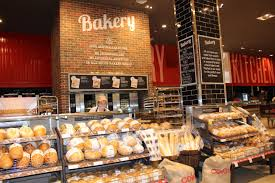

This dataset shows the transactions from a Bakery with the date, time, transaction number, and the category of the item for each of the 21,293 goods sold. 

In this analysis, we will explore the relationship between the variables, including which product is most frequently sold and what time and date that products is sold.

*Data Source:* https://www.kaggle.com/xvivancos/transactions-from-a-bakery


> *"Baking and coding involve using the same parts of your brain and a lot of the same skills, like being able to follow directions or create directions in a very systematic way." [-Robin Sloan](https://www.brainyquote.com/quotes/robin_sloan_915309?src=t_baking)*



# Contents

- [Import Modules and Load Data](#Import-Modules-and-Load-Data)

- [What Does the Data Look Like?](#What-Does-the-Data-Look-Like?)

- [Organizing the Data](#Organizing-the-Data)
    - [Creating a New Dataframe](#Creating-a-New-Dataframe)

- [A Note About Store Hours](#A-Note-About-Store-Hours) 

- [Weekday Coffee Sales](#Weekday-Coffee-Sales) 

- [Weekend Coffee Sales](#Weekend-Coffee-Sales) 

- [T-tests](#T-tests)
    - [Preparing Samples of Morning and Afternoon Transactions](#Preparing-Samples-of-Morning-and-Afternoon-Transactions)
    - [T-test #1: Weekday Mornings versus Weekday Afternoons](#T-test-#1:-Weekday-Mornings-versus-Weekday-Afternoons)
    - [T-test #2: Weekend Mornings versus Weekend Afternoons](#T-test-#2:-Weekend-Mornings-versus-Weekend-Afternoons)
    - [T-test #3: Weekday Mornings versus Weekend Mornings](#T-test-#3:-Weekday-Mornings-versus-Weekend-Mornings)
    - [T-test #4: Weekday Afternoons versus Weekend Afternoons](#T-test-#4:-Weekday-Afternoons-versus-Weekend-Afternoons)
- [Additional Research Proposal](#Additional-Research-Proposal)

## Import Modules and Load Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
baking = pd.read_csv("https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/BreadBasket_DMS.csv")

----------------
## What Does the Data Look Like?

In [5]:
baking.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

We rename the columns to make them easier to work with.

In [0]:
baking.rename(columns = {'Date': 'date','Time':'time','Transaction':'transaction','Item':'item'}, inplace=True)

The data has 21,293 rows and 4 columns.

In [5]:
baking.shape

(21293, 4)

We want a count of any the values that are missing (NaN).

In [7]:
baking.isnull().sum(axis = 0)

date           0
time           0
transaction    0
item           0
dtype: int64

Here we see the unique items sold in the bakery and get a count of the total unique items.

In [7]:
baking.item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [8]:
baking.item.unique().size

95

We see our interquantile ranges for the items sold in the bakery. Then we get a count for the top ten selling items and finally plot the count of all our items sold in a barplot.

In [8]:
item_count = baking.groupby('item').size()
item_count.describe()

count      95.000000
mean      224.136842
std       681.730333
min         1.000000
25%         6.000000
50%        16.000000
75%       150.500000
max      5471.000000
dtype: float64

In [9]:
item_count.sort_values(ascending=False)[:10]

item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
dtype: int64

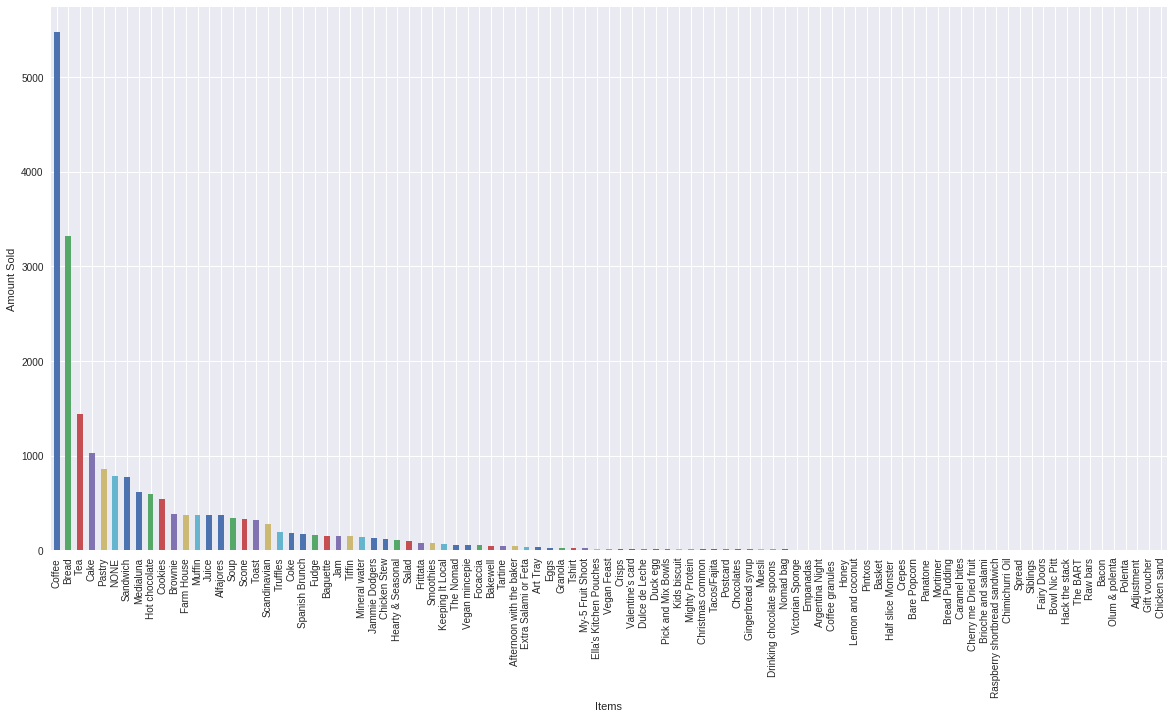

In [10]:
plt.figure(figsize=(20,10))
pd.value_counts(baking['item']).plot.bar()
plt.xlabel('Items')
plt.ylabel('Amount Sold')
plt.show()

Because there is not get a clear count of the lower selling items in the visualization, I gather their counts as well.

In [11]:
pd.value_counts(baking['item'])[48:]

Crisps                           14
Valentine's card                 13
Dulce de Leche                   13
Duck egg                         12
Pick and Mix Bowls               12
Kids biscuit                     12
Mighty Protein                   11
Christmas common                 11
Tacos/Fajita                     11
Postcard                         10
Chocolates                       10
Gingerbread syrup                 9
Muesli                            8
Drinking chocolate spoons         8
Nomad bag                         8
Victorian Sponge                  7
Empanadas                         7
Argentina Night                   7
Coffee granules                   7
Honey                             6
Lemon and coconut                 6
Pintxos                           6
Basket                            6
Half slice Monster                6
Crepes                            6
Bare Popcorn                      5
Panatone                          5
Mortimer                    

----------------
## Organizing the Data

### Creating a New Dataframe

In order to sort by date and time, we create a new dataframe to more easily index those columns.

In [0]:
newBakingDf = pd.DataFrame({"datetime": [], "transaction": [], "item": []})

In [0]:
newBakingDf['datetime'] = pd.to_datetime(baking['date'] + ' '+ baking['time'])
newBakingDf['transaction'] = baking['transaction']
newBakingDf['item'] = baking['item']

In [14]:
newBakingDf['day_of_week'] = newBakingDf['datetime'].dt.weekday_name
newBakingDf.describe()

,transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [0]:
for i in (newBakingDf,):
    i['year'] = i.datetime.dt.year
    i['month'] = i.datetime.dt.month
    i['day'] = i.datetime.dt.day
    i['day_of_week'] = i.datetime.dt.weekday_name
    i['hour'] = i.datetime.dt.hour
    i['minute'] = i.datetime.dt.minute

In [16]:
def getEarliestSale(dayOfWeek):

  isMon = newBakingDf['day_of_week'] == dayOfWeek
  BakingMon = newBakingDf[isMon]

  minHour = BakingMon['hour'].min()

  isMinHour = BakingMon['hour'] == minHour

  minHourMon = BakingMon[isMinHour]

  minMinute = minHourMon['minute'].min()
  
  return ("earliest sale time is " + str(minHour) + ":" + str(minMinute) )


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
  print (day + " " + getEarliestSale(day))

Monday earliest sale time is 7:29
Tuesday earliest sale time is 7:42
Wednesday earliest sale time is 7:49
Thursday earliest sale time is 7:46
Friday earliest sale time is 7:32
Saturday earliest sale time is 7:56
Sunday earliest sale time is 1:21


In [17]:
def getLatestSale(dayOfWeek):

  isMon = newBakingDf['day_of_week'] == dayOfWeek
  BakingMon = newBakingDf[isMon]

  maxHour = BakingMon['hour'].max()

  isMaxHour = BakingMon['hour'] == maxHour

  maxHourMon = BakingMon[isMaxHour]

  maxMinute = maxHourMon['minute'].max()
  
  return ("latest sale time is " + str(maxHour) + ":" + str(maxMinute) )


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
  print (day + " " + getLatestSale(day))

Monday latest sale time is 18:28
Tuesday latest sale time is 23:38
Wednesday latest sale time is 22:15
Thursday latest sale time is 20:11
Friday latest sale time is 20:20
Saturday latest sale time is 23:20
Sunday latest sale time is 18:56


----------------
## A Note About Store Hours
Given the irregularity of the opening and closing hours seen above, I have decided to instead sample from hours that are in every day of the week. Additionally, since coffee accounts for a large portion of the overall transactions, we will look at only those transactions in more detail. To do so, we will create four groups. We will sample coffee sales 3 hours before noon during both weekdays and weekends. We will also sample coffee sales 3 hours after noon during weekdays and weekends. Given that coffee is typically used as a stimulant, I hypothesize that we will see the most sales during the morning on weekdays. If the t-tests show that the means of our weekday morning samples are statistically significant from the other three groups, we can reject the null hypothesis.

In [0]:
newBakingDf = newBakingDf.reset_index()
newBakingDf['weekday'] = newBakingDf['datetime'].dt.dayofweek


In [0]:
newBakingDf['weekday'] = newBakingDf['datetime'].apply(lambda x: x.weekday())

weekdays_only = newBakingDf[newBakingDf['weekday'] < 5 ]
weekday_morn = weekdays_only[(weekdays_only.hour>9) & (weekdays_only.hour<12)]
weekday_aftn = weekdays_only[(weekdays_only.hour>12) & (weekdays_only.hour<15)]

weekends_only = newBakingDf[newBakingDf['weekday'] > 4 ]
weekend_morn = weekends_only[(weekends_only.hour>9) & (weekends_only.hour<12)]
weekend_aftn = weekends_only[(weekends_only.hour>12) & (weekends_only.hour<15)]

In [0]:
coffee_weekday_morn = weekday_morn[weekday_morn['item'] == 'Coffee']
coffee_weekday_aftn = weekday_aftn[weekday_aftn['item'] == 'Coffee']
coffee_weekend_morn = weekend_morn[weekend_morn['item'] == 'Coffee']
coffee_weekend_aftn = weekend_aftn[weekend_aftn['item'] == 'Coffee']

In [21]:
weekdayMornSalesAggregation = coffee_weekday_morn.groupby(['month', 'day']).sum()
weekdayAftnSalesAggregation = coffee_weekday_aftn.groupby(['month', 'day']).sum()
weekendMornSalesAggregation = coffee_weekend_morn.groupby(['month', 'day']).sum()
weekendAftnSalesAggregation = coffee_weekend_aftn.groupby(['month', 'day']).sum()

weekdayMornSalesAggregation['weekday']
weekdayAftnSalesAggregation['weekday']

weekendMornSalesAggregation['weekday']
weekendAftnSalesAggregation['weekday'] 

month  day
1      7       80
       8       90
       14      60
       15      48
       21      40
       22      72
       28      25
       29      30
2      4       75
       5       78
       11      60
       12      54
       18      55
       19      96
       25      40
       26     138
3      4       50
       5       30
       11      40
       12      78
       18      25
       19      54
       25      90
       26      42
4      1       35
       2       18
       8       35
       9       24
10     30      78
11     5       60
       6       72
       12      70
       13      48
       19      75
       20      42
       26      55
       27      66
12     3       60
       4       84
       10      40
       11      48
       17      35
       18      72
       24      60
       31      60
Name: weekday, dtype: int64

In [22]:
weekdayMornSalesAggregation['weekday'].shape

(112,)

----------------
## Weekday Coffee Sales
Here we see various plots comparing sales of coffee during weekday mornings and weekday afternoons. The distribution of sales appear similar in the violin plots. However, morning sales appear slightly higher in the lineplot below.

Text(0,0.5,'Number of coffee units sold per day')

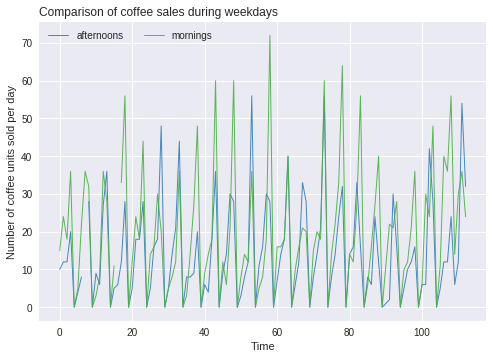

In [23]:
numberOfDays = weekendMornSalesAggregation['weekday'].shape[0]

df=pd.DataFrame({'x': range(0,113), 
                 'mornings': weekdayMornSalesAggregation['weekday'], 
                 'afternoons': weekdayAftnSalesAggregation['weekday'] 
                 })

plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')

num=0
for column in df.drop('x', axis=1):
  num+=1
  plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.title("Comparison of coffee sales during weekdays", loc='left', fontsize=12, 
          fontweight=0,)
plt.xlabel("Time")
plt.ylabel("Number of coffee units sold per day")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


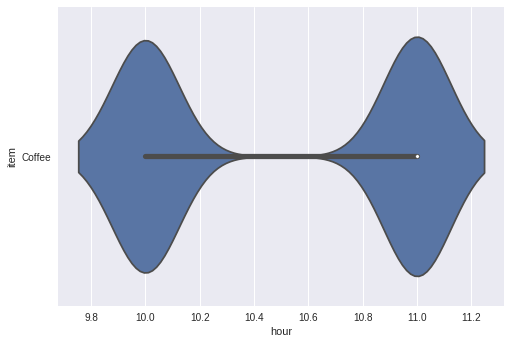

In [24]:
ax = sns.violinplot(x="hour", y="item", data=coffee_weekday_morn, scale="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


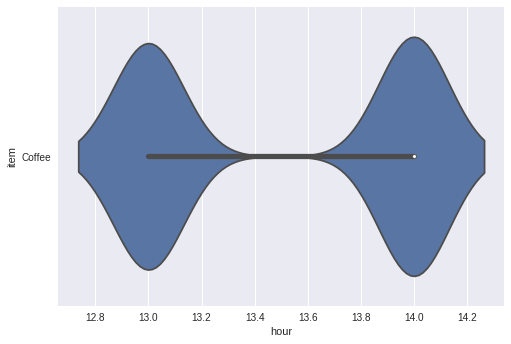

In [25]:
ax = sns.violinplot(x="hour", y="item", data=coffee_weekday_aftn, scale="count")

In [26]:
weekendMornSalesAggregation['weekday'].shape

(45,)

----------------
## Weekend Coffee Sales
Here we see various plots comparing sales of coffee during weekend mornings and weekend afternoons. The lineplot distribution shows more sales in the mornings than in the afternoons. However, the violinplots of each appear to show the opposite trend. This may be an example of Simpson's Paradox. Since the visualizations are inconclusive, the t-test will be more valuable in our assessment.

Text(0,0.5,'Number of coffee units sold per day')

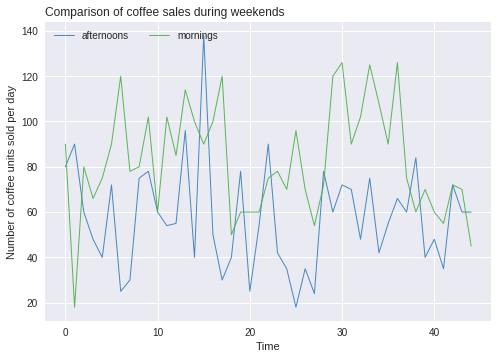

In [27]:
numberOfDays = weekendMornSalesAggregation['weekday'].shape[0]

df=pd.DataFrame({'x': range(0,45), 
                 'mornings': weekendMornSalesAggregation['weekday'], 
                 'afternoons': weekendAftnSalesAggregation['weekday'] 
                 })

plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')

num=0
for column in df.drop('x', axis=1):
  num+=1
  plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)

plt.title("Comparison of coffee sales during weekends", loc='left', fontsize=12, 
          fontweight=0)
plt.xlabel("Time")
plt.ylabel("Number of coffee units sold per day")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


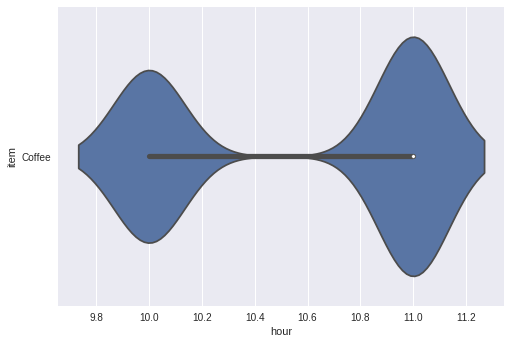

In [28]:
ax = sns.violinplot(x="hour", y="item", data=coffee_weekend_morn, scale="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


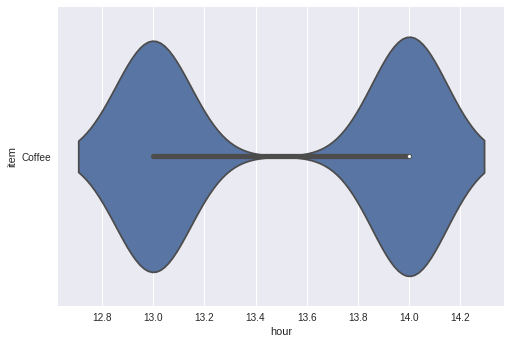

In [29]:
ax = sns.violinplot(x="hour", y="item", data=coffee_weekend_aftn, scale="count")

The Violinplots show a bimodal distribution of sales in both weekdays and weekends. 

----------------
## T-tests

### Preparing Samples of Morning and Afternoon Transactions
Our t-tests will compare the rates of coffee sales between the morning and afternoon hours during both weekdays and weekends. To do this, we need to take a sample of the rate of coffee transactions from each group. Given that there are 21,293 total transactions, I decided on a sample size of 1,000.

In [0]:
import scipy
from scipy import stats
from scipy.stats import ttest_ind

In [0]:
weekday_morn_sample = weekday_morn.sample(n=1000, random_state=0)
weekday_aftn_sample = weekday_aftn.sample(n=1000, random_state=0)
weekend_morn_sample = weekend_morn.sample(n=1000, random_state=0)
weekend_aftn_sample = weekend_aftn.sample(n=1000, random_state=0)

In [0]:
weekday_morn_sample['iscoffee'] = weekday_morn_sample['item'] == 'Coffee'
weekday_aftn_sample['iscoffee'] = weekday_aftn_sample['item'] == 'Coffee'
weekend_morn_sample['iscoffee'] = weekend_morn_sample['item'] == 'Coffee'
weekend_aftn_sample['iscoffee'] = weekend_aftn_sample['item'] == 'Coffee'

### T-test #1: Weekday Mornings versus Weekday Afternoons
In our first test, we see that the p-value is very small when comparing weekday mornings versus weekday afternoons. This indicates it is not likely that these samples could have come from the population. Thus, we can see that the differences in sales between the two samples is statistically significant. 

In [40]:
stats.ttest_ind(weekday_morn_sample['iscoffee'], weekday_aftn_sample['iscoffee'])

Ttest_indResult(statistic=4.419270514658123, pvalue=1.0434068618966886e-05)

### T-test #2: Weekend Mornings versus Weekend Afternoons
In our second test, we see that the p-value is greater than 0.05 when comparing weekend mornings versus weekend afternoons. Conversely, this means it is likely that these samples could have come from the same population. Thus, the difference between morning coffee sales and afternoon coffee sales is more similar during the weekends.

In [44]:
stats.ttest_ind(weekend_morn_sample['iscoffee'], weekend_aftn_sample['iscoffee'])

Ttest_indResult(statistic=1.8215430318951933, pvalue=0.06867381574014421)

### T-test #3: Weekday Mornings versus Weekend Mornings
In our third test, we see that the p-value is very small when comparing weekday mornings versus weekend afternoons. We also see a large t-value. This seems to favor our suggested hypothesis that the rate of coffee sales is highest during weekday mornings.

In [45]:
stats.ttest_ind(weekday_morn_sample['iscoffee'], weekend_morn_sample['iscoffee'])

Ttest_indResult(statistic=2.37733418736433, pvalue=0.01753191732347453)

### T-test #4: Weekday Afternoons versus Weekend Afternoons
In our final test, we see that the p-value and t-value indicate these samples are similar and could have come from the same population.

In [43]:
stats.ttest_ind(weekday_aftn_sample['iscoffee'], weekend_aftn_sample['iscoffee'])

Ttest_indResult(statistic=-0.21408715383675567, pvalue=0.8305009385666289)

----------------
## Additional Research Proposal
Given the t-test results, it will be interesting to see if these trends are similar for other items sold at the bakery. If we have more consistent store hours, we can also expand the range to see if coffee sales occur most frequently at a specific hour.